In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats 
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

file_path = "C:/Users/solmi/Downloads/인공지능개론/abalone.csv"  
df = pd.read_csv(file_path)

df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [63]:
# 결측치 확인
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [64]:
# 범주형 인코딩
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [65]:
# 입력과 타겟 분리
X = df.drop('Rings', axis = 1)
y = df['Rings']

In [66]:
# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
#원핫인코딩
Y = pd.get_dummies(y).values
X = X.values

In [68]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [69]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [70]:
X

array([[0.000e+00, 2.000e+00, 4.550e-01, ..., 2.245e-01, 1.010e-01,
        1.500e-01],
       [1.000e+00, 2.000e+00, 3.500e-01, ..., 9.950e-02, 4.850e-02,
        7.000e-02],
       [2.000e+00, 0.000e+00, 5.300e-01, ..., 2.565e-01, 1.415e-01,
        2.100e-01],
       ...,
       [4.174e+03, 2.000e+00, 6.000e-01, ..., 5.255e-01, 2.875e-01,
        3.080e-01],
       [4.175e+03, 0.000e+00, 6.250e-01, ..., 5.310e-01, 2.610e-01,
        2.960e-01],
       [4.176e+03, 2.000e+00, 7.100e-01, ..., 9.455e-01, 3.765e-01,
        4.950e-01]])

In [71]:
# 학습 데이터와 테스트 데이터 나누기
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((3341, 9), (836, 9), (3341, 28), (836, 28))

In [72]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(9,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 80        
                                                                 
 dense_13 (Dense)            (None, 30)                270       
                                                                 
 dense_14 (Dense)            (None, 30)                930       
                                                                 
 dense_15 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,311
Trainable params: 1,311
Non-trainable params: 0
_________________________________________________________________


In [73]:
N_EPOCHS = 10

history = model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
105/105 [==============================] - 2s 6ms/step - loss: 183.5419 - mse: 183.5419 - val_loss: 30.1903 - val_mse: 30.1903
Epoch 2/10
105/105 [==============================] - 0s 3ms/step - loss: 97.3491 - mse: 97.3491 - val_loss: 16.9122 - val_mse: 16.9122
Epoch 3/10
105/105 [==============================] - 0s 3ms/step - loss: 57.5275 - mse: 57.5275 - val_loss: 0.8331 - val_mse: 0.8331
Epoch 4/10
105/105 [==============================] - 0s 3ms/step - loss: 37.1698 - mse: 37.1698 - val_loss: 0.2291 - val_mse: 0.2291
Epoch 5/10
105/105 [==============================] - 0s 3ms/step - loss: 23.9341 - mse: 23.9341 - val_loss: 4.9530 - val_mse: 4.9530
Epoch 6/10
105/105 [==============================] - 0s 2ms/step - loss: 13.1796 - mse: 13.1796 - val_loss: 0.4647 - val_mse: 0.4647
Epoch 7/10
105/105 [==============================] - 0s 2ms/step - loss: 6.5422 - mse: 6.5422 - val_loss: 0.0474 - val_mse: 0.0474
Epoch 8/10
105/105 [==============================] - 0s 2

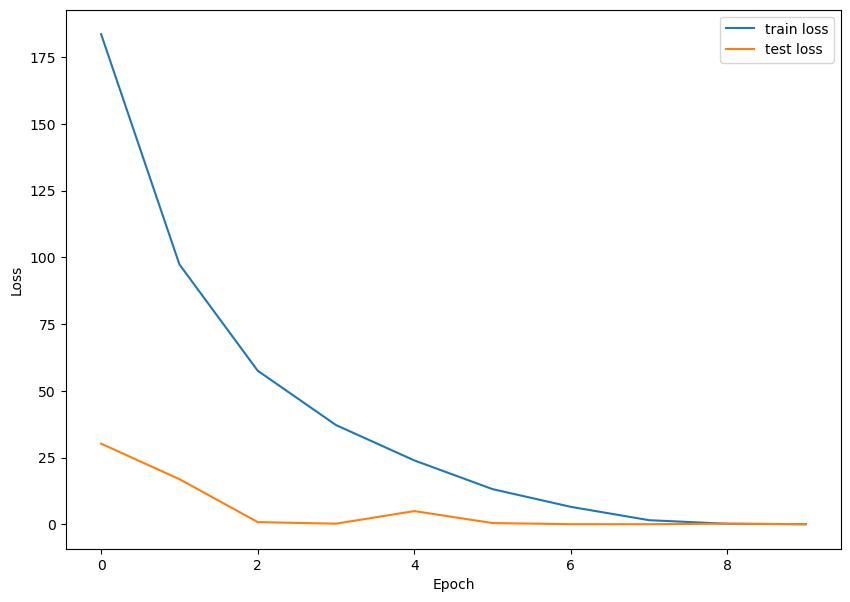

In [74]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.0344 - mse: 0.0344


[0.03443969041109085, 0.03443969041109085]